In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from geopy import distance

In [16]:
%matplotlib inline

In [31]:
df = pd.read_csv("/Users/kangchieh/Project/divvy_bike/data/divvy_202207-202306/csv/all_analyzed.csv")
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,ride_length,day_of_week,is_holiday,work_day,distance,rush_hour,speed,ride_length_category
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,...,-87.638506,member,11.750000,1,False,1,3.104577,1,0.264219,"(0.0, 30.0]"
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),A15541-1,Michigan Ave & 8th St,A623-1,41.869621,-87.623981,...,-87.623981,casual,1.883333,1,False,1,0.350123,0,0.185906,"(0.0, 30.0]"
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),A15541-1,Michigan Ave & 8th St,A623-1,41.869621,-87.623981,...,-87.623981,casual,7.716667,6,False,0,0.350123,0,0.045372,"(0.0, 30.0]"
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),A15541-1,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,...,-87.596471,casual,58.483333,6,False,0,8.569135,0,0.146523,"(30.0, 60.0]"
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,...,-87.652662,member,26.300000,2,False,1,5.418878,0,0.206041,"(0.0, 30.0]"


# size

In [229]:
ratio = df.groupby('member_casual').size() / len(df) * 100
ratio

member_casual
casual    38.831625
member    61.168375
dtype: float64

Text(0.5, 1.0, 'Member type percentage')

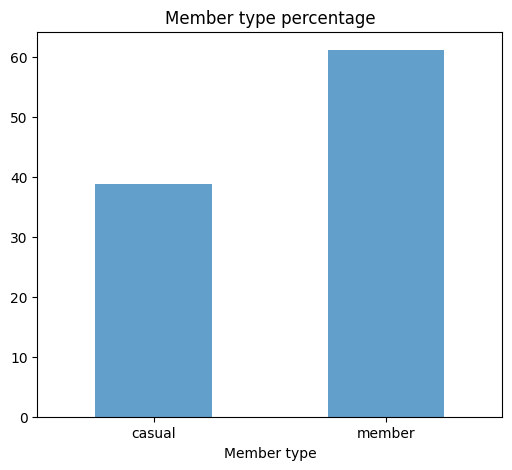

In [230]:
fig_ratio, ax_ratio = plt.subplots(figsize=(6, 5))
ratio.plot.bar(ax=ax_ratio, alpha=0.7)
ax_ratio.set_xticklabels(["casual","member"], rotation=0) 
ax_ratio.set_xlabel('Member type')
ax_ratio.set_title('Member type percentage')

# Distance

In [92]:
dist = df.groupby('member_casual').agg({'distance': ['mean', 'median']})
dist


distance          
                   mean    median
member_casual                    
casual         2.134677  1.612688
member         2.105076  1.505767

(0.0, 2.4)

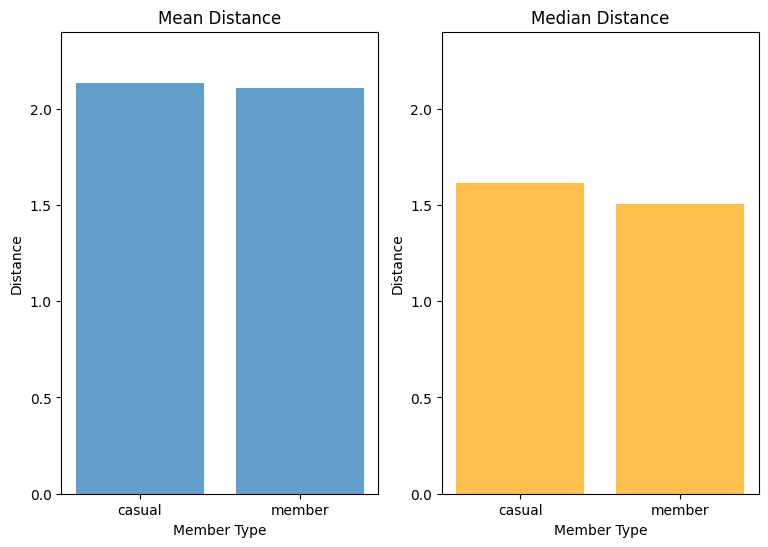

In [93]:
dist = dist.reset_index()

member_casual = dist['member_casual']
mean_distance = dist['distance']['mean']
median_distance = dist['distance']['median']

x = np.arange(len(member_casual))

plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.bar(x, mean_distance, bar_width, label='Mean Distance', alpha=0.7)
plt.xticks(x, member_casual)
plt.xlabel('Member Type')
plt.ylabel('Distance')
plt.title('Mean Distance')
plt.ylim(0, 2.4)

plt.subplot(1, 2, 2)
plt.bar(x, median_distance, bar_width, label='Median Distance', alpha=0.7, color='orange')
plt.xticks(x, member_casual)
plt.xlabel('Member Type')
plt.ylabel('Distance')
plt.title('Median Distance')
plt.ylim(0, 2.4)

# length of ride

In [211]:
length = df.groupby('member_casual').agg({'ride_length': ['mean', 'median']})
length

ride_length       
                     mean median
member_casual                   
casual          27.729068  12.00
member          12.379864   8.55

In [212]:
length = length.reset_index()

Text(0.5, 1.0, 'Median Length')

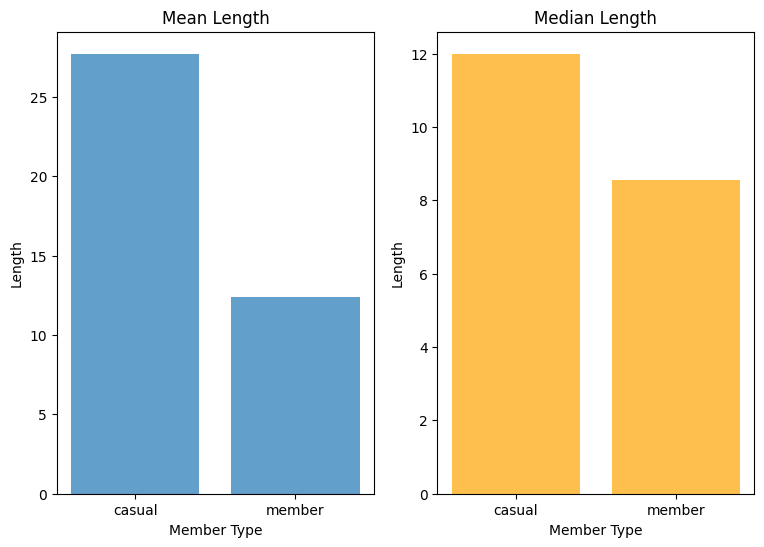

In [213]:
member_casual = length['member_casual']
mean_length = length['ride_length']['mean']
median_length = length['ride_length']['median']

x = np.arange(len(member_casual))

plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.bar(x, mean_length, label='Mean Length', alpha=0.7)
plt.xticks(x, member_casual)
plt.xlabel('Member Type')
plt.ylabel('Length')
plt.title('Mean Length')
# plt.ylim(0, 2.4)

plt.subplot(1, 2, 2)
plt.bar(x, median_length, label='Median Length', alpha=0.7, color='orange')
plt.xticks(x, member_casual)
plt.xlabel('Member Type')
plt.ylabel('Length')
plt.title('Median Length')
# plt.ylim(0, 2.4)

# Length group

In [116]:
df['ride_length_category'] = df['ride_length_category'].astype("category")
df['ride_length_category'] = df['ride_length_category'].cat.set_categories(['(0.0, 30.0]', '(30.0, 60.0]', '(60.0, 120.0]', '(120.0, inf]'], ordered=True)

In [231]:
length_group = df.groupby(['member_casual', 'ride_length_category']).size() / df.groupby('member_casual').size() * 100
length_group

member_casual  ride_length_category
casual         (0.0, 30.0]             83.498466
               (30.0, 60.0]            10.893340
               (60.0, 120.0]            4.121730
               (120.0, inf]             1.474790
member         (0.0, 30.0]             94.216241
               (30.0, 60.0]             5.072765
               (60.0, 120.0]            0.485546
               (120.0, inf]             0.216622
dtype: float64

In [232]:
length_group = length_group.unstack('member_casual')
length_group

member_casual,casual,member
ride_length_category,,
"(0.0, 30.0]",83.498466,94.216241
"(30.0, 60.0]",10.893340,5.072765
"(60.0, 120.0]",4.121730,0.485546
"(120.0, inf]",1.474790,0.216622


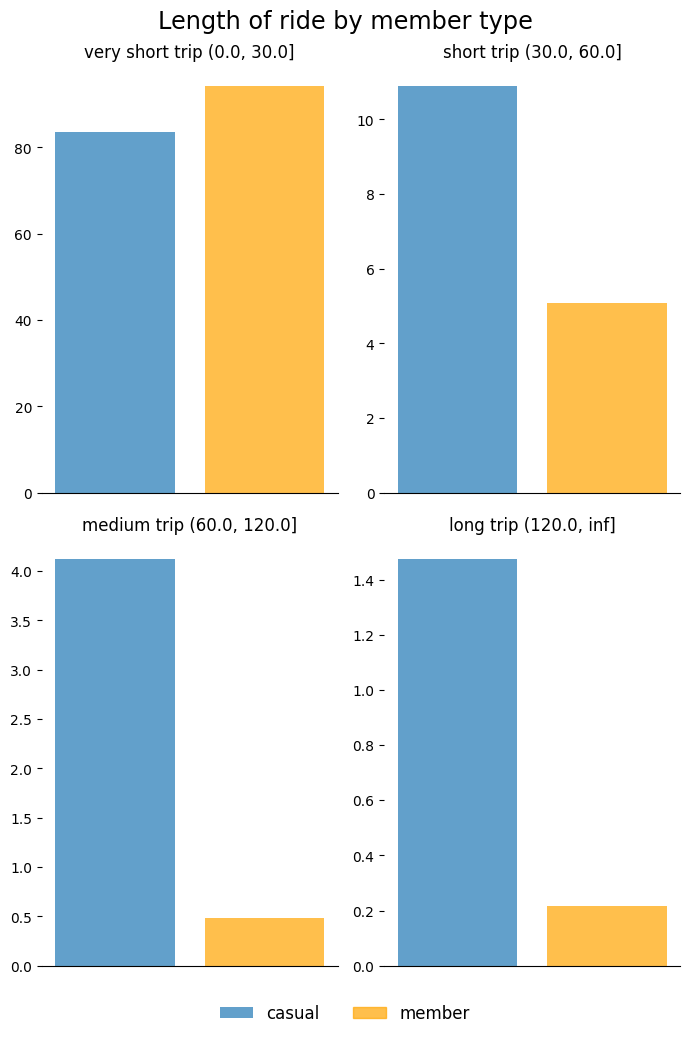

In [233]:
fig_length_group, ax_length_group = plt.subplots(2, 2, figsize=(7, 10))
x = np.arange(len(member_casual))
title_dict = {0: 'very short trip (0.0, 30.0]', 1: 'short trip (30.0, 60.0]', 2: 'medium trip (60.0, 120.0]', 3: 'long trip (120.0, inf]'}

for i in range(4):
    ax_length_group[int(i//2), int(i%2)].bar(x,length_group.iloc[i], color=[(0.12, 0.47, 0.71), 'orange'], alpha=0.7)
    ax_length_group[int(i//2), int(i%2)].set_title(title_dict[i])

    ax_length_group[int(i//2), int(i%2)].get_xaxis().set_visible(False)
    ax_length_group[int(i//2), int(i%2)].spines['top'].set_visible(False)
    ax_length_group[int(i//2), int(i%2)].spines['right'].set_visible(False)
    ax_length_group[int(i//2), int(i%2)].spines['left'].set_visible(False)

fig_length_group.suptitle('Length of ride by member type', fontsize='xx-large')
leg = fig_length_group.legend(loc=9, labels=['casual', 'member'],  fontsize='large', frameon=False, bbox_to_anchor=(0.5, 0), ncol=2)
leg.legendHandles[1].set_color('orange')
plt.tight_layout()


# Work day

In [234]:
work_day = df.groupby(['work_day', 'member_casual']).size() / df.groupby('work_day').size() * 100
work_day

work_day  member_casual
0         casual           48.769579
          member           51.230421
1         casual           34.814287
          member           65.185713
dtype: float64

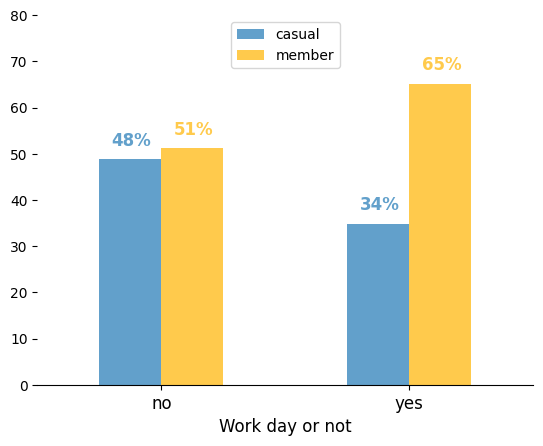

In [247]:
ax_work_day = work_day.unstack('member_casual').plot.bar(color=[(0.12, 0.47, 0.71), '#FFB400'], alpha=0.7)
ax_work_day.set_xlabel('Work day or not', fontsize='large')
ax_work_day.set_xticklabels(["no","yes"], rotation=0, fontsize='large') 
ax_work_day.spines['top'].set_visible(False)
ax_work_day.spines['right'].set_visible(False)
ax_work_day.spines['left'].set_visible(False)

ax_work_day.legend(loc=9)
ax_work_day.axis(ymax=80)

for i, v in enumerate(work_day):
    if i % 2 == 1:
        ax_work_day.text(int(i/2)+0.05, v+3, str(int(v))+'%', color='#FFB400', alpha=0.7, fontweight='bold', fontsize='large')
    else:
        ax_work_day.text(int(i/2)-0.2, v+3, str(int(v))+'%', color=(0.12, 0.47, 0.71), alpha=0.7, fontweight='bold', fontsize='large')

# Rush hour

In [238]:
rush_hour = df.groupby(['rush_hour', 'member_casual']).size() / df.groupby('rush_hour').size() * 100
rush_hour

rush_hour  member_casual
0          casual           42.855196
           member           57.144804
1          casual           31.142981
           member           68.857019
dtype: float64

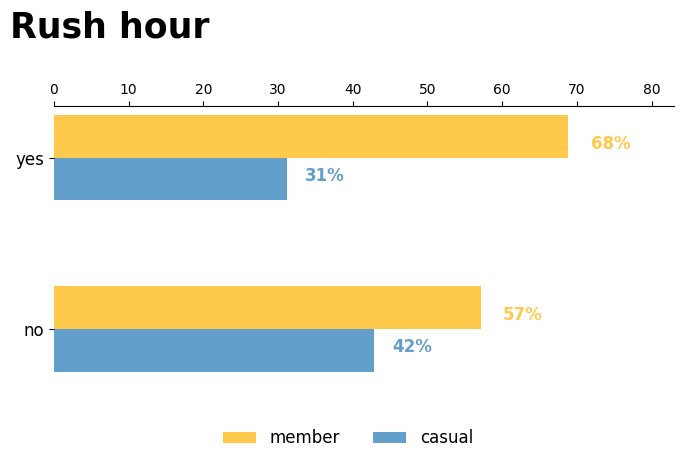

In [250]:
ax_rush_hour = rush_hour.unstack('member_casual').plot(figsize=(8, 4), kind='barh', color=[(0.12, 0.47, 0.71), '#FFB400'], alpha=0.7, width=0.5)
# for bars in ax_rush_hour.containers[0]:
#     bars.set_alpha(0.2)
ax_rush_hour.set_title("Rush hour", fontweight='bold', fontsize=25, x=0.09, pad=50)
# ax.set_ylabel('Rush hour\n or not', fontsize=14, rotation=0, labelpad=30)
ax_rush_hour.set_ylabel('')
ax_rush_hour.set_yticklabels(['no', 'yes'], rotation=0, fontsize=12)
ax_rush_hour.xaxis.tick_top()
# ax.get_xaxis().set_visible(False)
# ax.spines['top'].set_visible(False)
ax_rush_hour.spines['right'].set_visible(False)
ax_rush_hour.spines['left'].set_visible(False)
ax_rush_hour.spines['bottom'].set_visible(False)

handles, labels = ax_rush_hour.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax_rush_hour.legend(handles, labels, loc=0, fontsize='large', frameon=False, bbox_to_anchor=(0.7, 0), ncol=2)

ax_rush_hour.axis(xmax=83, ymax=1.3)
for i, v in enumerate(rush_hour):
    if i % 2 == 1:
        ax_rush_hour.text(v+3, int(i/2)+0.05, str(int(v))+'%', color='#FFB400', fontweight='bold', fontsize='large', alpha=0.7)
    else:
        ax_rush_hour.text(v+2.5, int(i/2)-0.135, str(int(v))+'%', color=(0.12, 0.47, 0.71), fontweight='bold', fontsize='large', alpha=0.7)